In [211]:
%matplotlib inline
import matplotlib.pyplot as pyplt
import ast
import pandas as pd
from matplotlib.ticker import PercentFormatter, MultipleLocator, MaxNLocator
from matplotlib.dates import MinuteLocator,DateFormatter
import matplotlib.dates as mdates

In [212]:
path = "2023-11-04-3SLJ"
# region = "ap-northeast-1"
region = "ap-northeast-2"
# region = "ap-northeast-2"
# region = "ap-northeast-3"
# region = "ap-south-1"
# region = "ap-southeast-1"
# region = "ap-southeast-2"
# region = "ca-central-1"
# region = "eu-central-1"
# region = "eu-north-1"
# region = "eu-west-1"
# region = "eu-west-2"
# region = "eu-west-3"
# region = "sa-east-1"
# region = "us-east-1"
# region = "us-east-2"
# region = "us-west-1"
# region = "us-west-2"
data_path = f'./result_data/{path}/result.csv'

In [213]:
df = pd.read_csv(data_path)
df = df[df['Region'] == region]
df.head()

,Region,vCPU_Count,region_vCPU_Percent,Timestamp
0,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.699091e+09
1,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.699091e+09
2,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.699091e+09
3,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.699091e+09
4,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.699091e+09


In [214]:
df['vCPU_Count'] = df['vCPU_Count'].apply(ast.literal_eval)
df['region_vCPU_Percent'] = df['region_vCPU_Percent'].apply(ast.literal_eval)

In [215]:
vcpu_cols = df['vCPU_Count'].apply(pd.Series)
vcpu_cols = vcpu_cols.add_prefix('number_')

percent_cols = df['region_vCPU_Percent'].apply(pd.Series)
percent_cols = percent_cols.add_prefix('percent_')

# UTC Timestamp
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

In [216]:
df = pd.concat([df.drop(['vCPU_Count', 'region_vCPU_Percent'], axis=1), vcpu_cols, percent_cols], axis=1)
df.sort_values('Timestamp',inplace=True)
df.head()

,Region,Timestamp,number_INF,number_TRN,number_DL,number_G_VT,number_P5,number_P2_P3_P4,number_F,number_X,number_STANDARD,percent_INF,percent_TRN,percent_DL,percent_G_VT,percent_P5,percent_P2_P3_P4,percent_F,percent_X,percent_STANDARD
2137,ap-northeast-2,2023-11-04 09:35:03.715710976,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1759,ap-northeast-2,2023-11-04 09:35:09.303422976,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
678,ap-northeast-2,2023-11-04 09:35:14.943176960,0,0,0,0,0,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1760,ap-northeast-2,2023-11-04 09:35:20.495082496,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
323,ap-northeast-2,2023-11-04 09:35:26.002501888,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [217]:
# for column in vcpu_cols.columns:
#     fig, ax = pyplt.subplots(figsize=(40,10))
#     df.plot(x='Timestamp', y=f'{column}', ax=ax, title=f'vCPU Count : {column[7:]}', rot=45, legend=False)
#     pyplt.tight_layout()
#     pyplt.show()

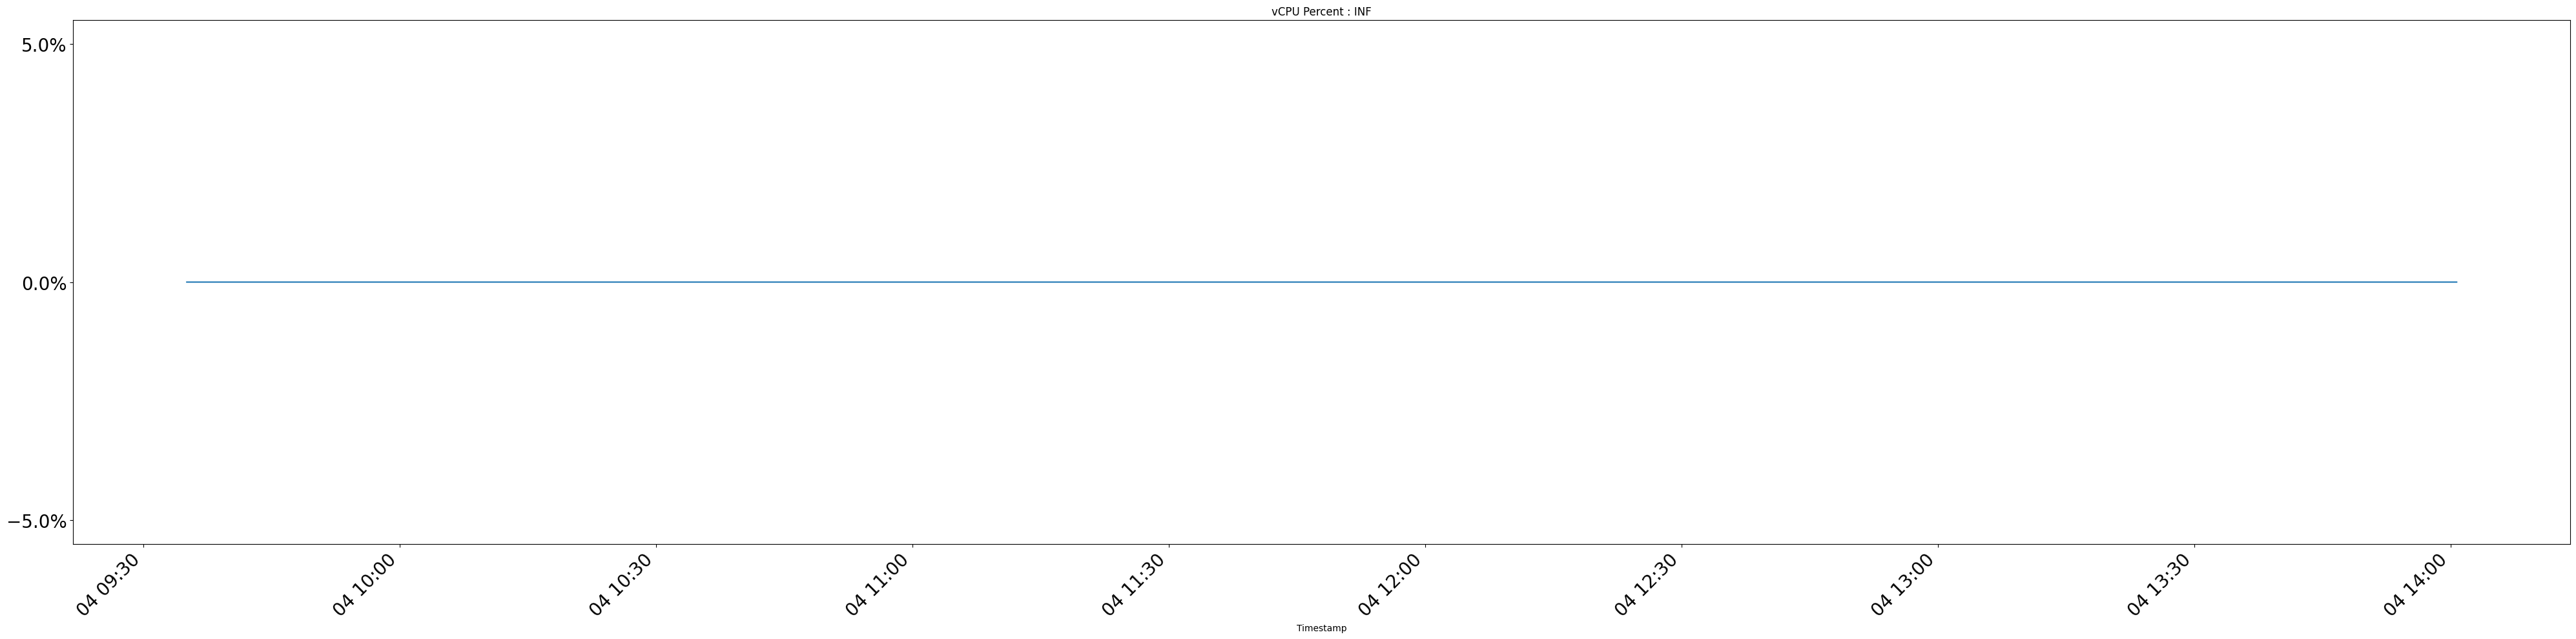

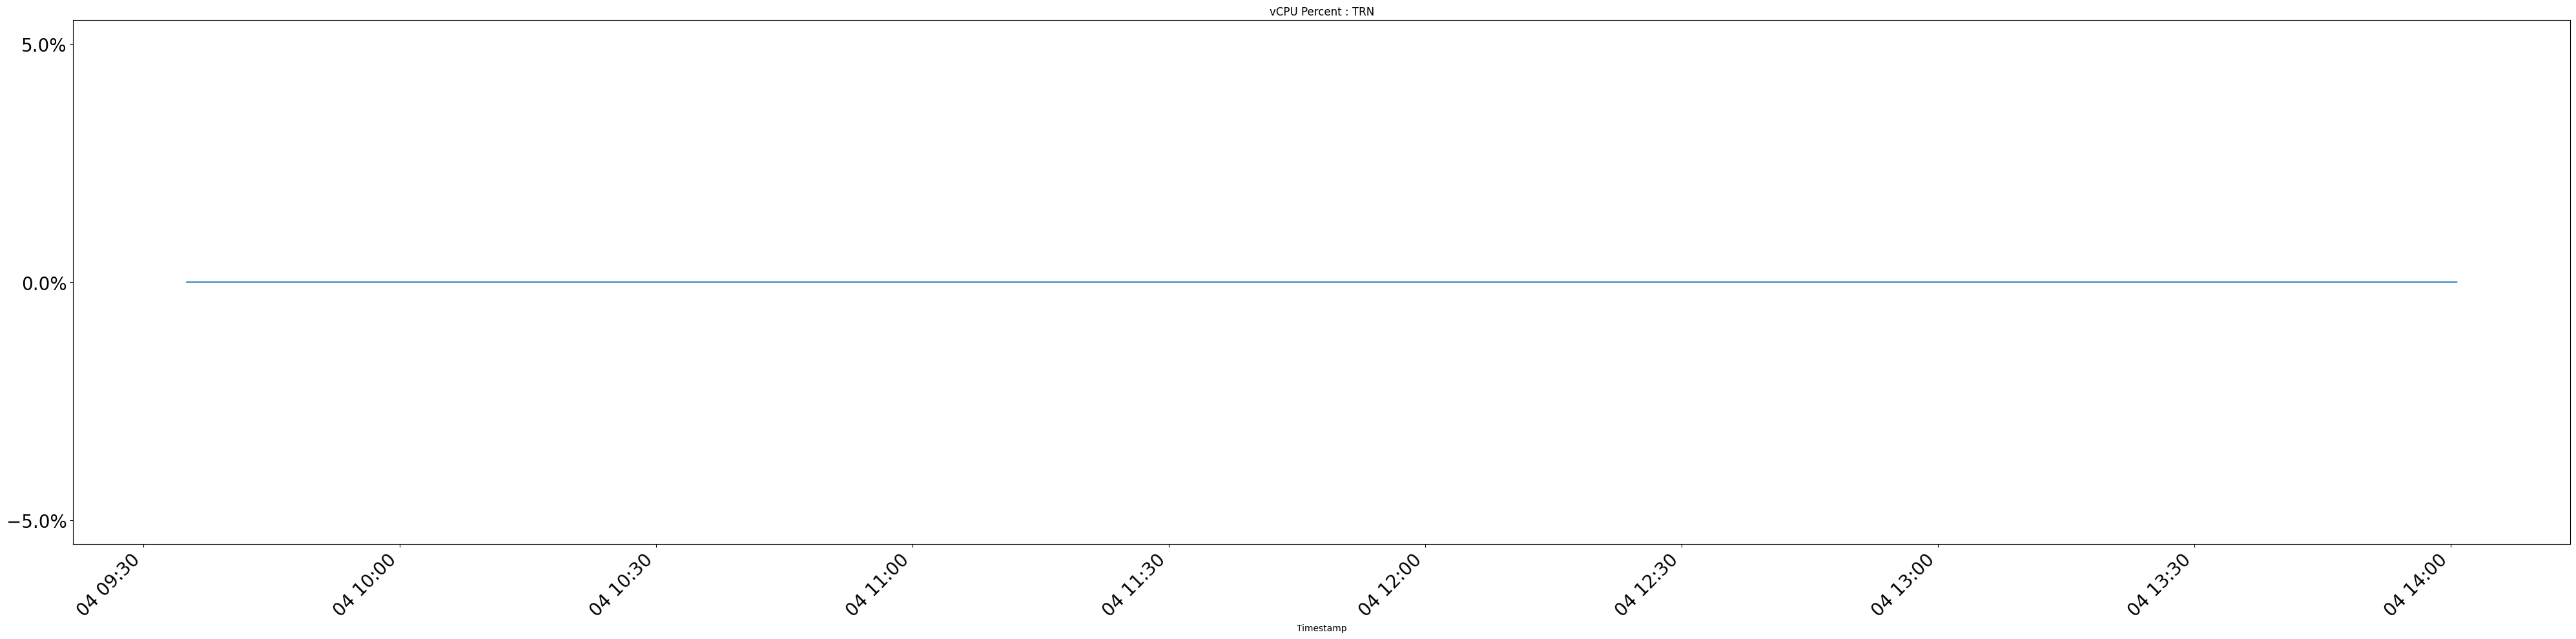

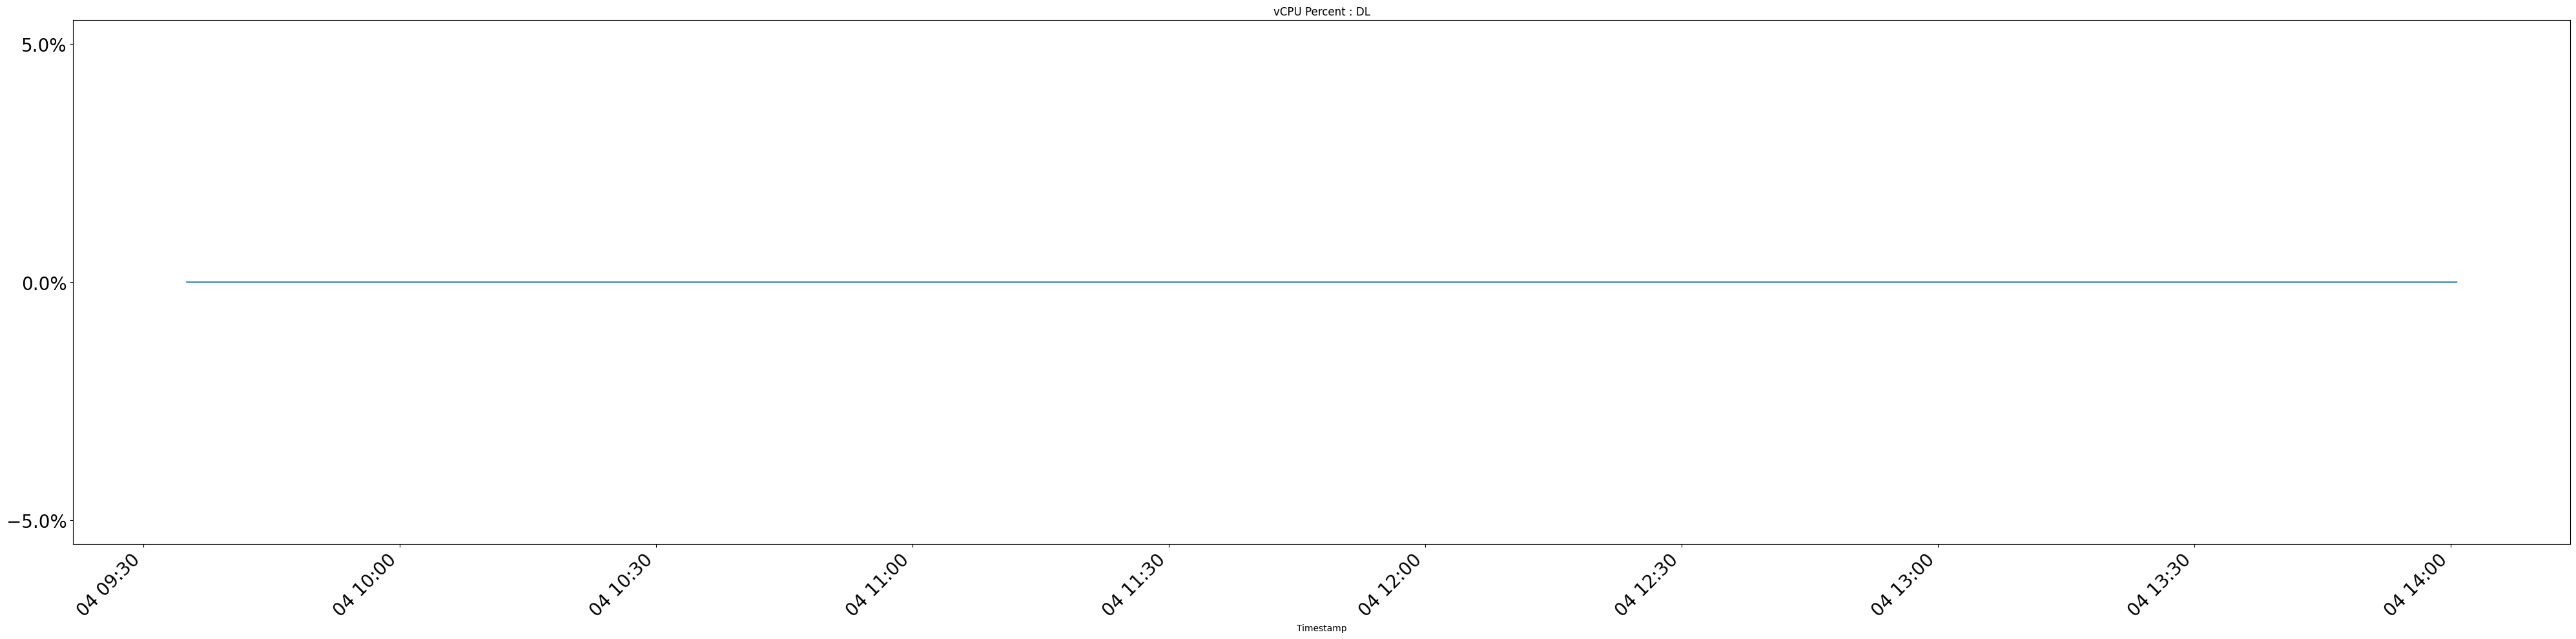

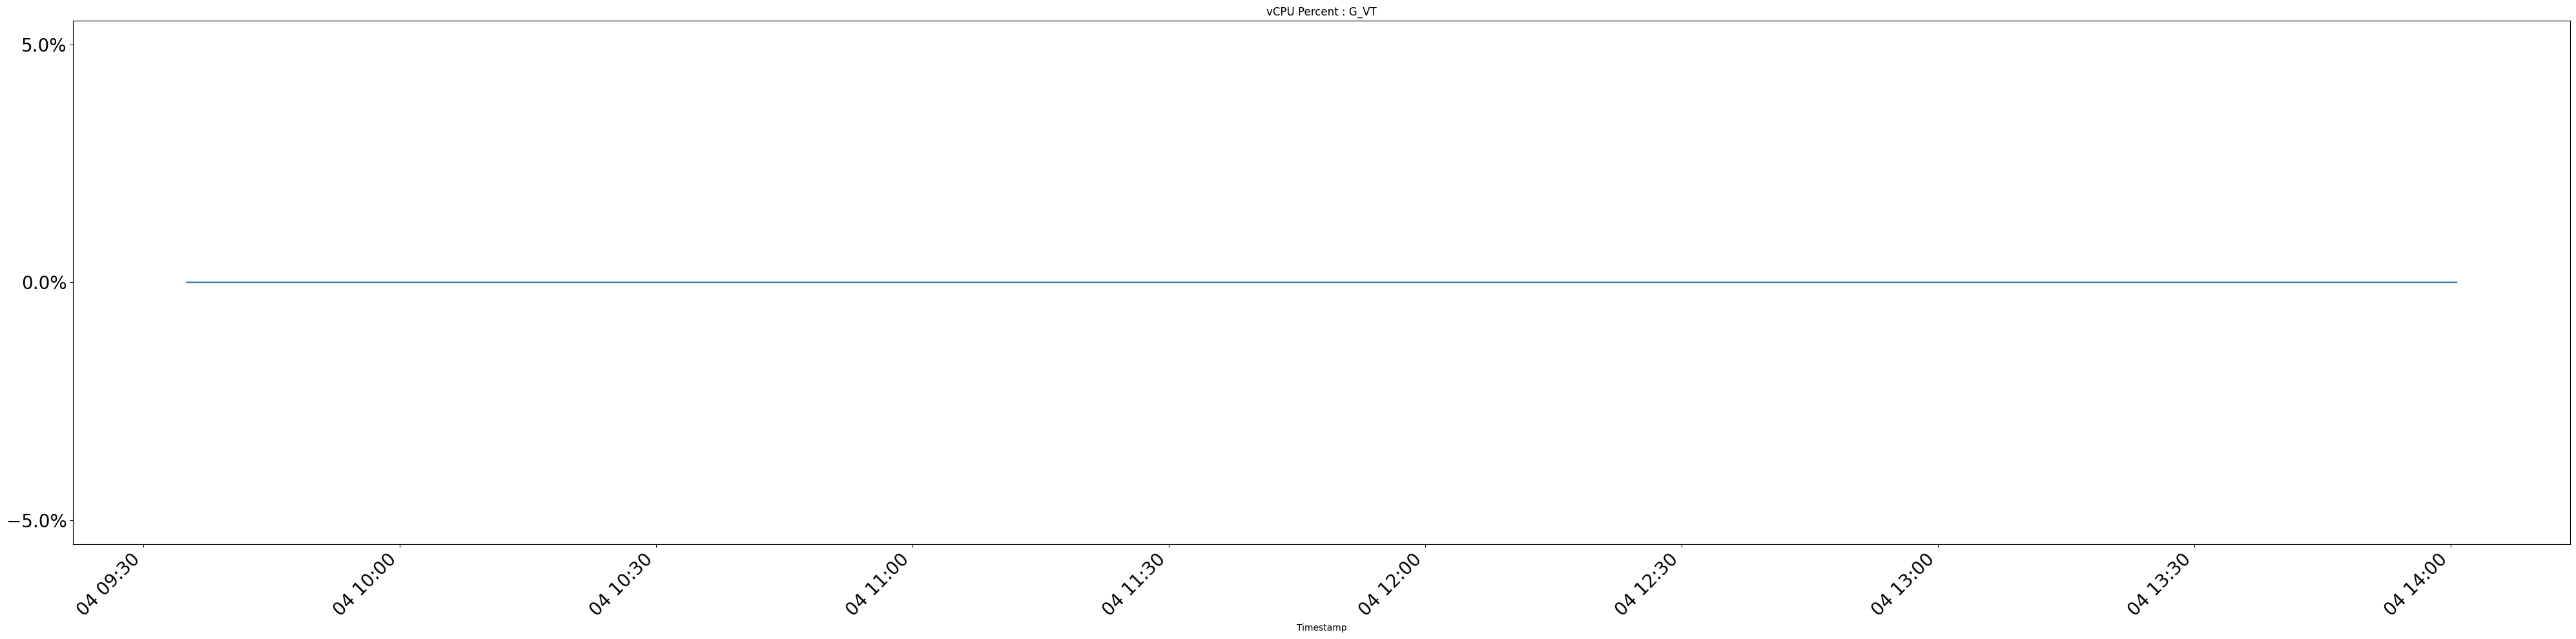

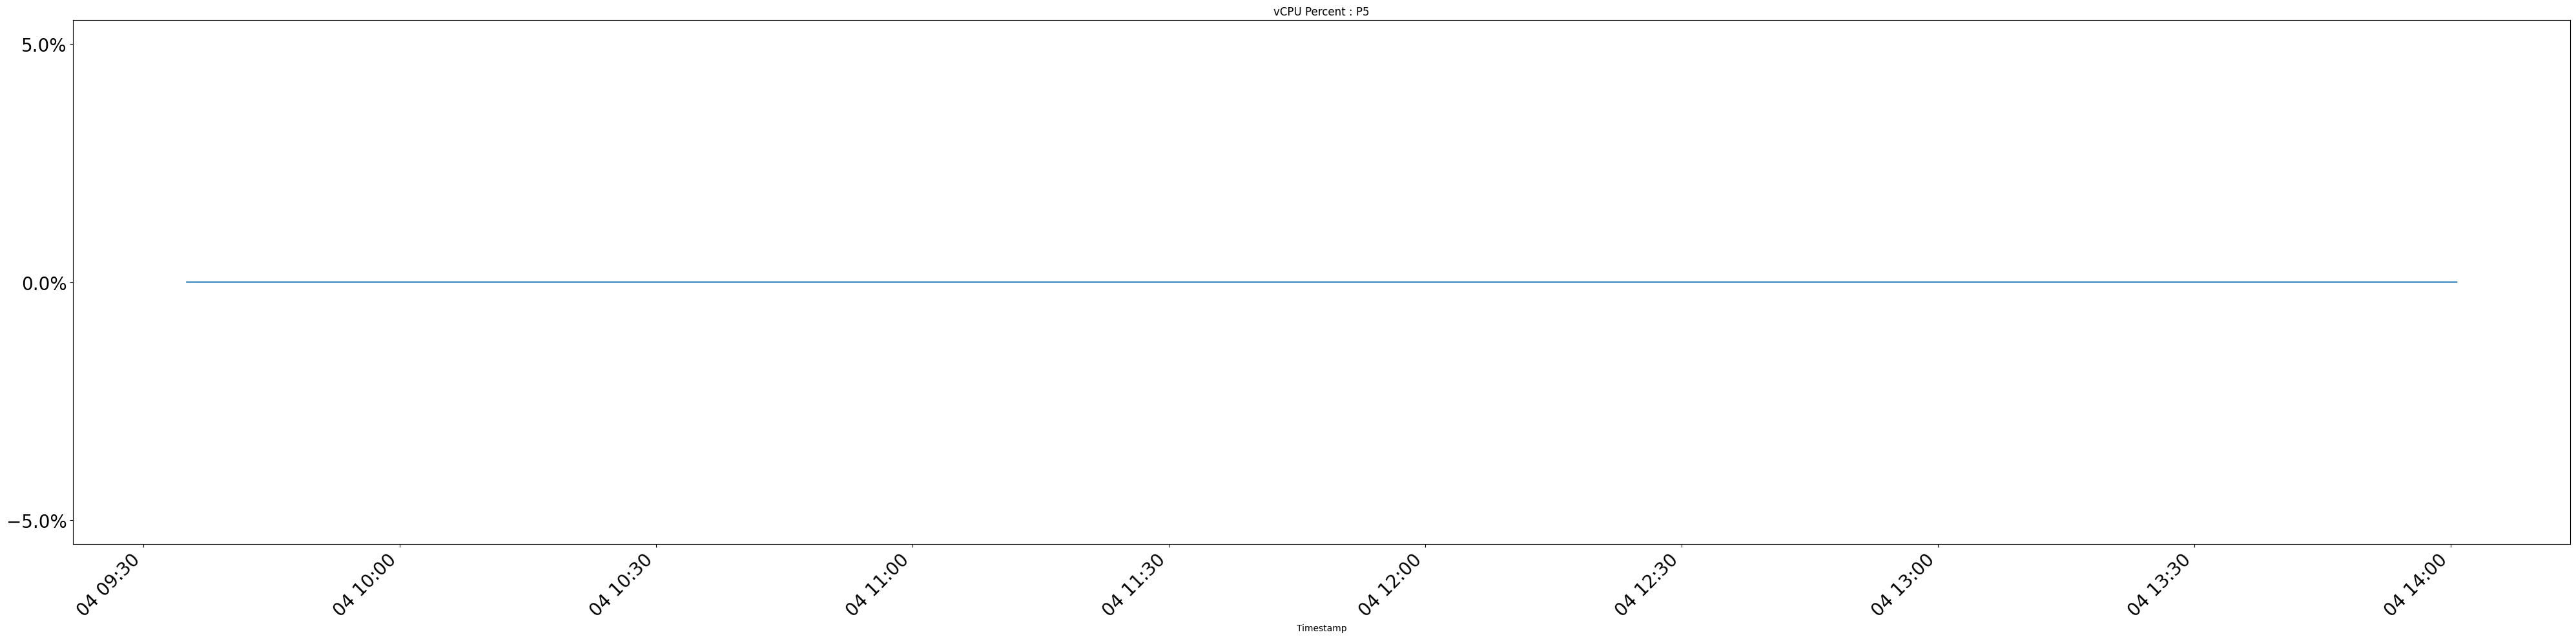

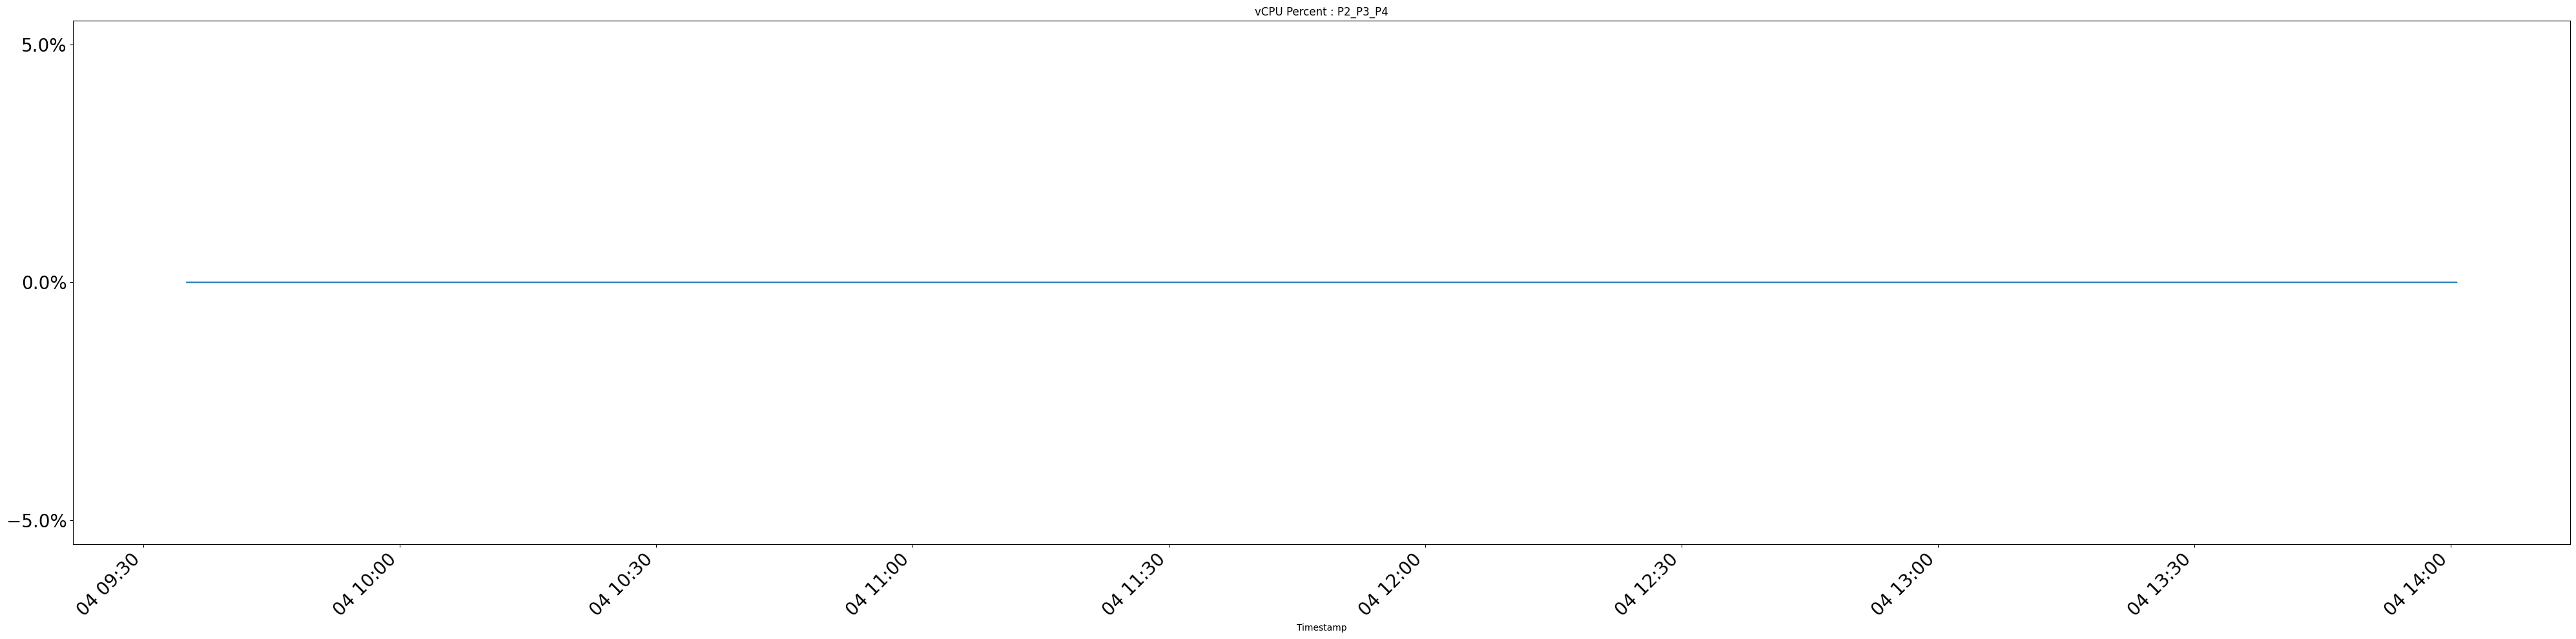

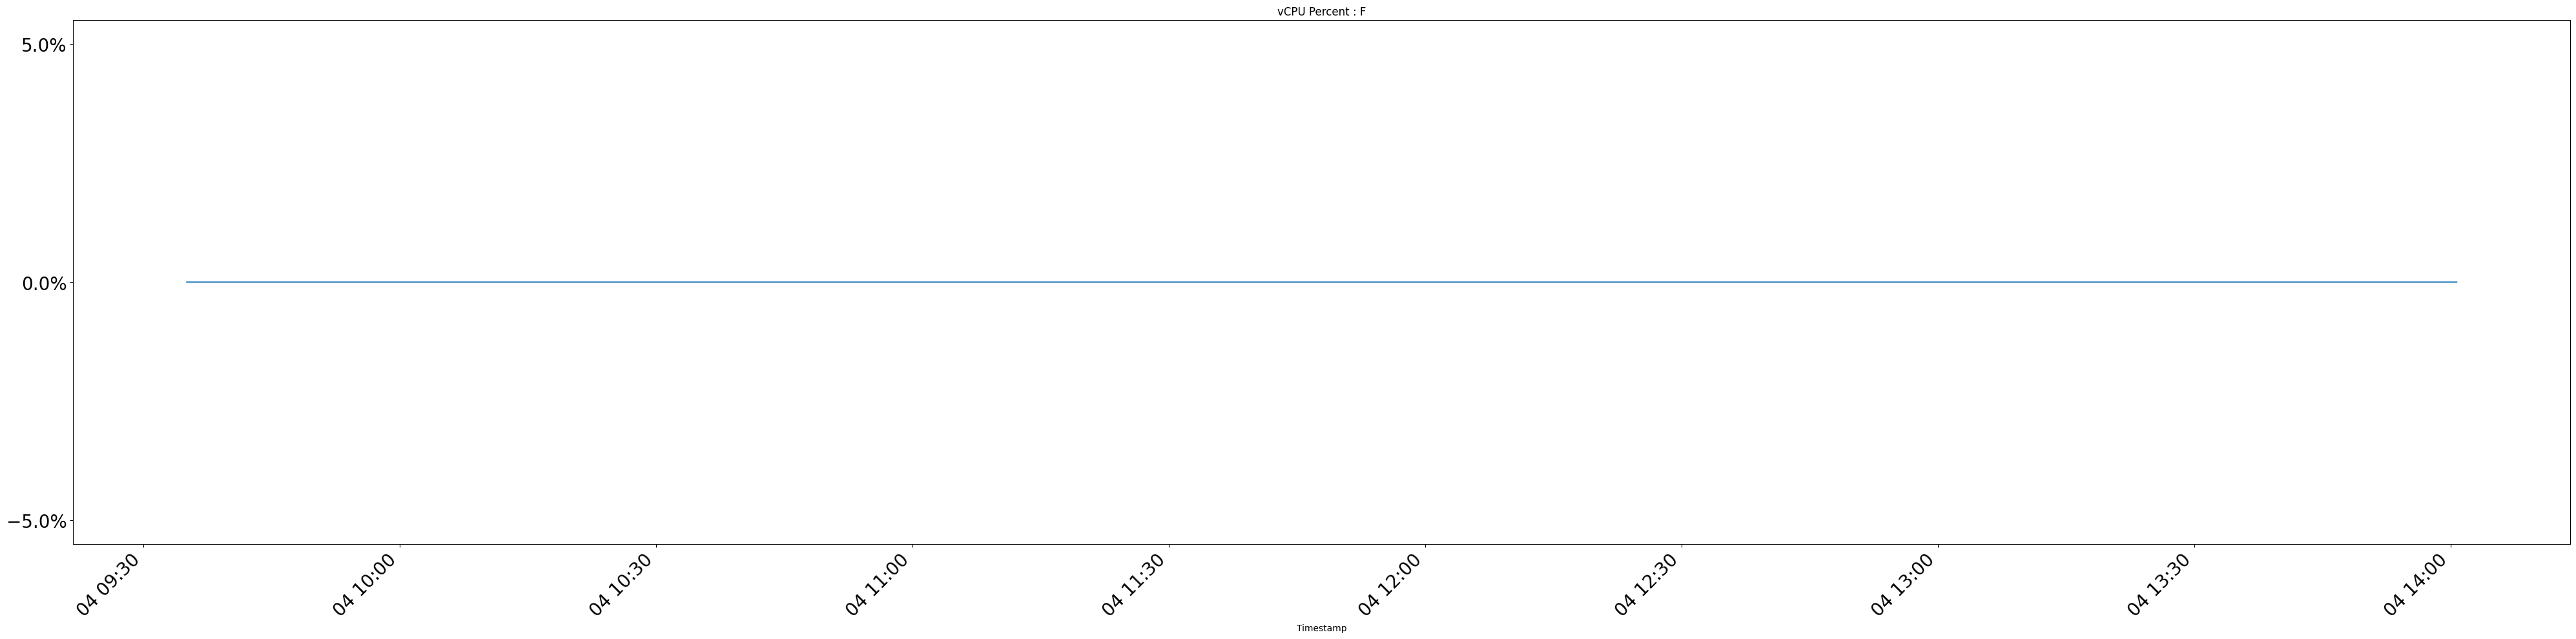

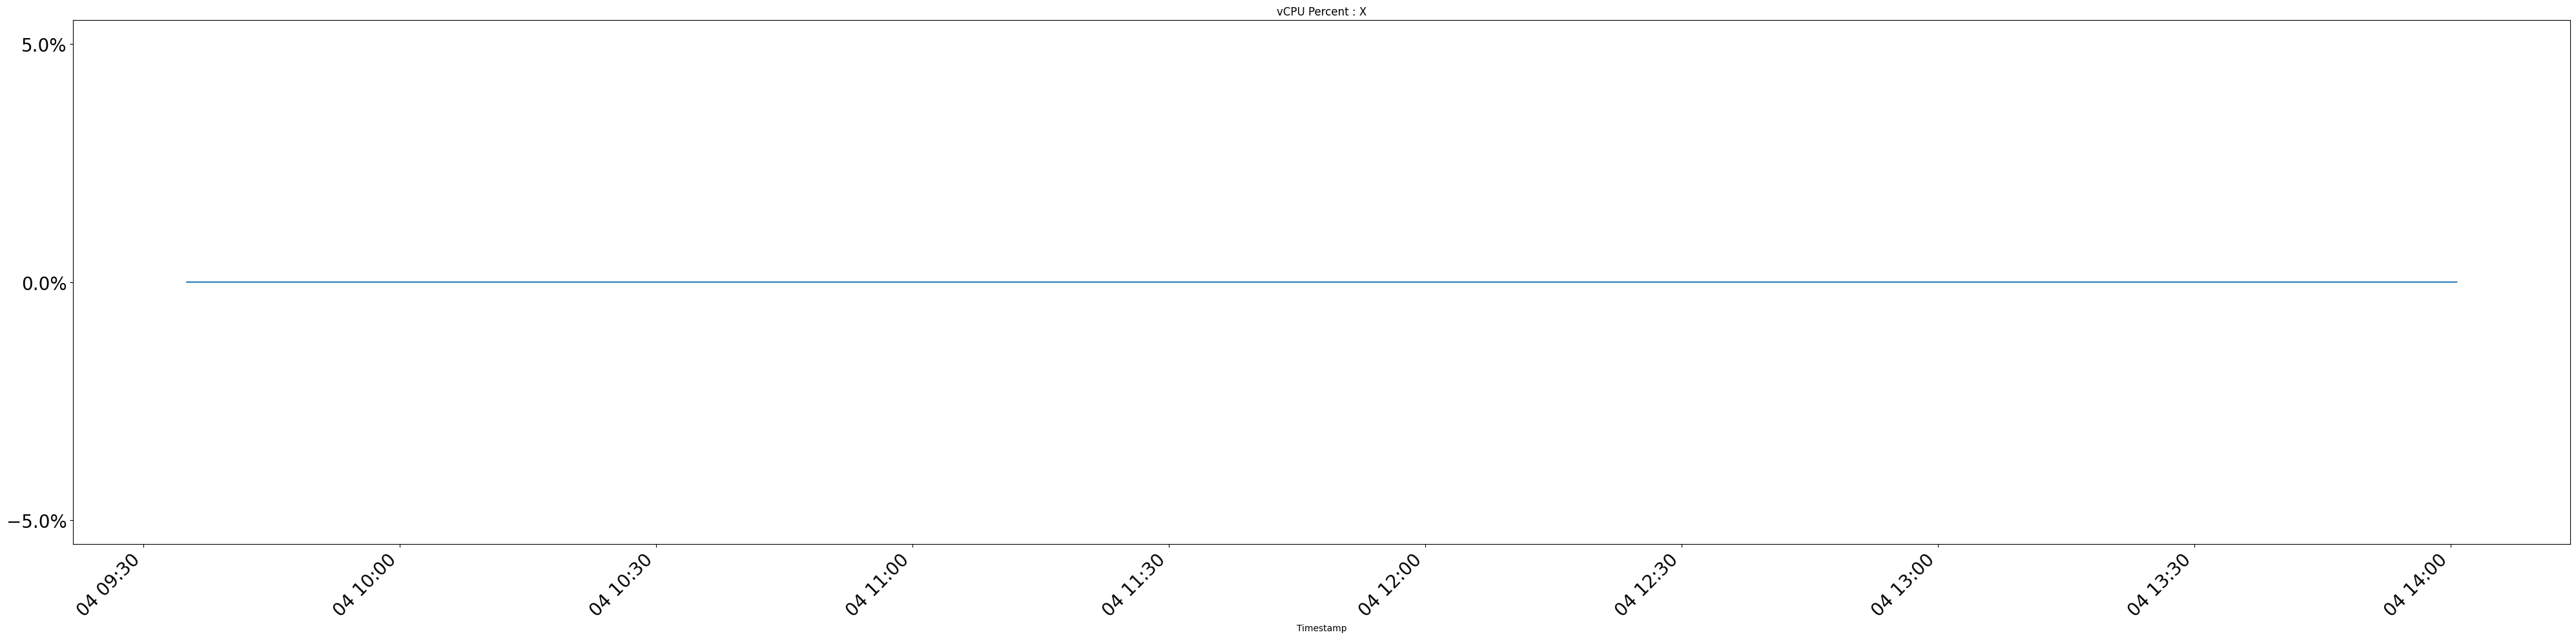

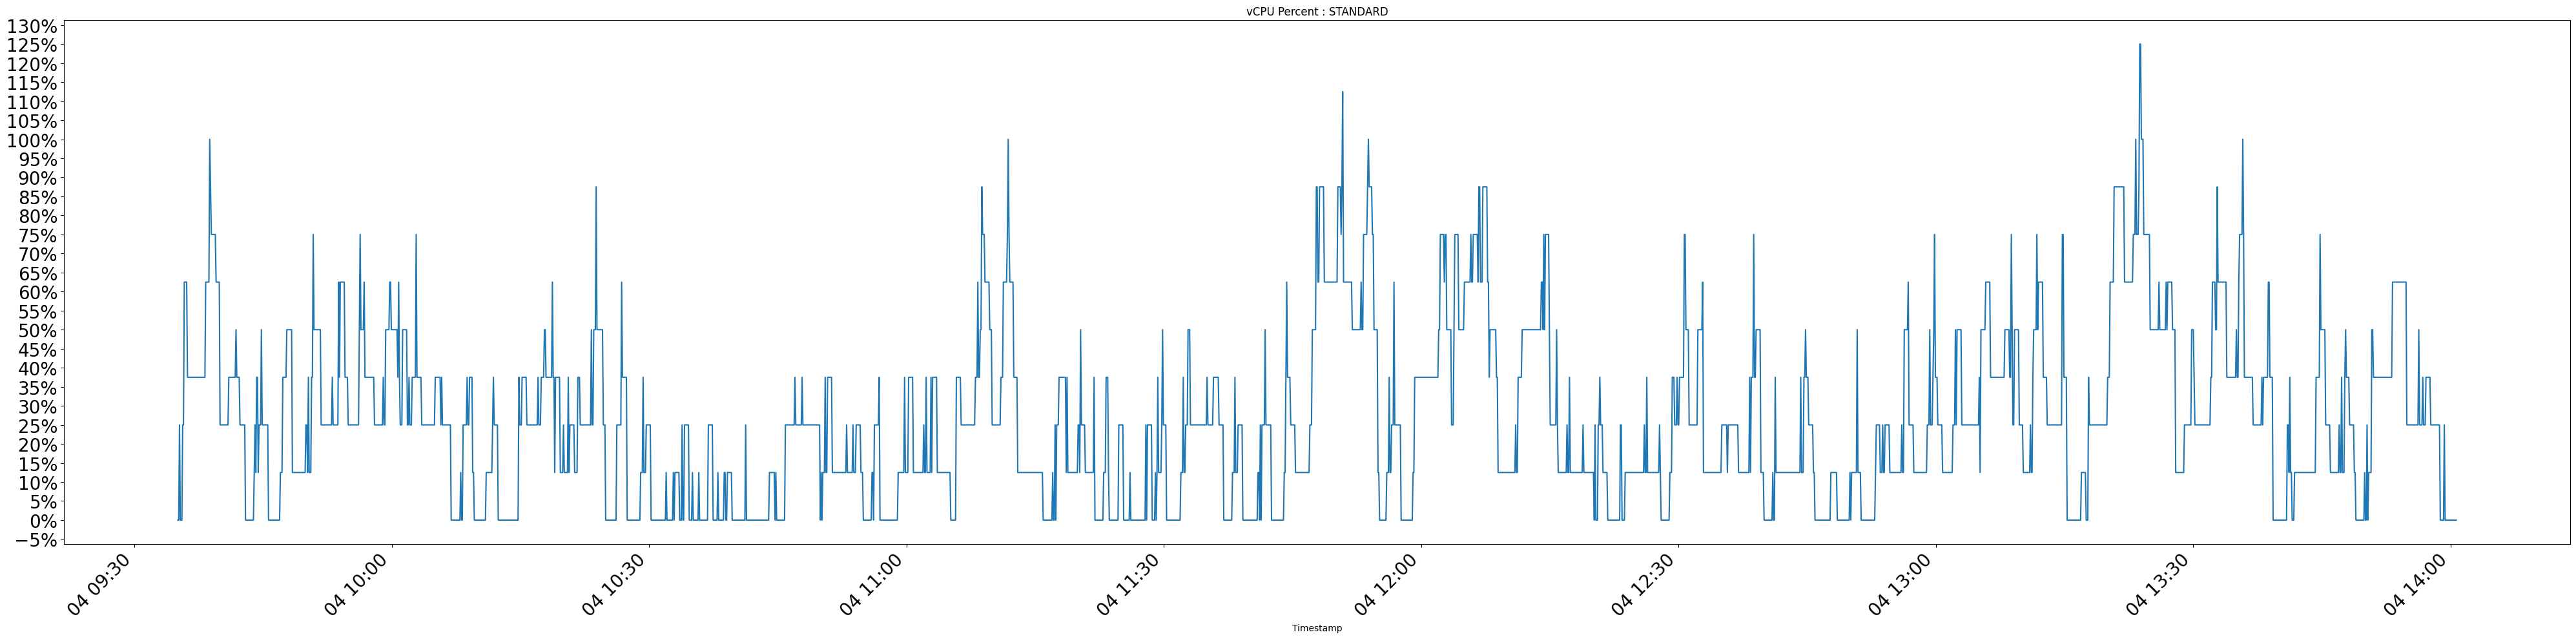

In [218]:
for column in percent_cols.columns:
    fig, ax = pyplt.subplots(figsize=(40,10))
    df.plot(x='Timestamp', y=f'{column}', ax=ax, title=f'vCPU Percent : {column[8:]}', rot=45, legend=False)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.05))
    ax.tick_params(axis='both', which='major', labelsize=20)
    pyplt.tight_layout()
    pyplt.show()

In [219]:
for column in percent_cols.columns:
    filtered_data = df[df[f'{column}'] >= 0.9]
    print(f'Timestamps when region_vCPU_Percent for {column} is >= 0.9:')
    print(filtered_data[['Timestamp', f'{column}']])


Timestamps when region_vCPU_Percent for percent_INF is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_INF]
Index: []
Timestamps when region_vCPU_Percent for percent_TRN is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_TRN]
Index: []
Timestamps when region_vCPU_Percent for percent_DL is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_DL]
Index: []
Timestamps when region_vCPU_Percent for percent_G_VT is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_G_VT]
Index: []
Timestamps when region_vCPU_Percent for percent_P5 is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_P5]
Index: []
Timestamps when region_vCPU_Percent for percent_P2_P3_P4 is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_P2_P3_P4]
Index: []
Timestamps when region_vCPU_Percent for percent_F is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_F]
Index: []
Timestamps when region_vCPU_Percent for percent_X is >= 0.9:
Empty DataFrame
Columns: [Timestamp, percent_X]
Index: []
Timestamps when 

In [220]:
def nearest(group):
    target = group.index[0].replace(minute=0, second=0) + pd.Timedelta(minutes=5*(group.index[0].minute // 5))
    time_deltas = abs(group.index - target)  # Get the absolute time differences
    nearest_idx = time_deltas.argmin()  # Find the index of the minimum time difference
    return group.loc[group.index[nearest_idx]]

In [221]:
# 5분 간격으로 리샘플링하여 평균 계산
df.set_index('Timestamp', inplace=True)
numeric_cols = df.select_dtypes(include=['float'])
resampled_df = numeric_cols.resample('5T').mean()
# resampled_df = numeric_cols.resample('5T').apply(nearest)
full_index = pd.date_range(start=resampled_df.index.min(), end=resampled_df.index.max(), freq='1T')
resampled_df = resampled_df.reindex(full_index).fillna(0)

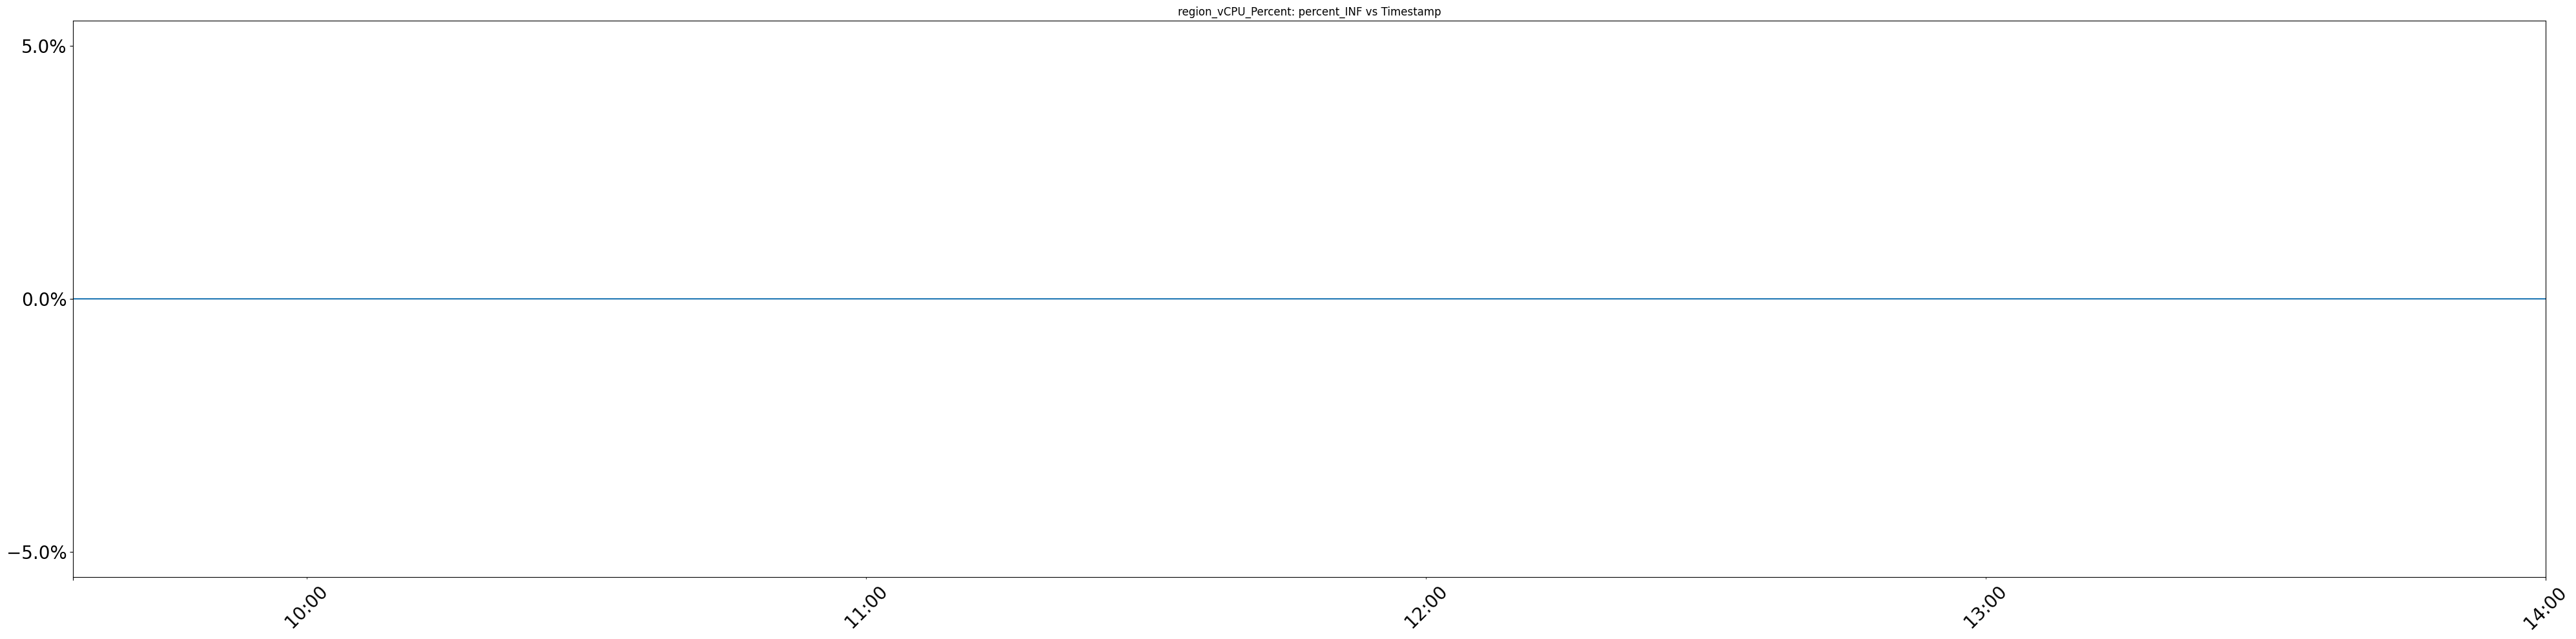

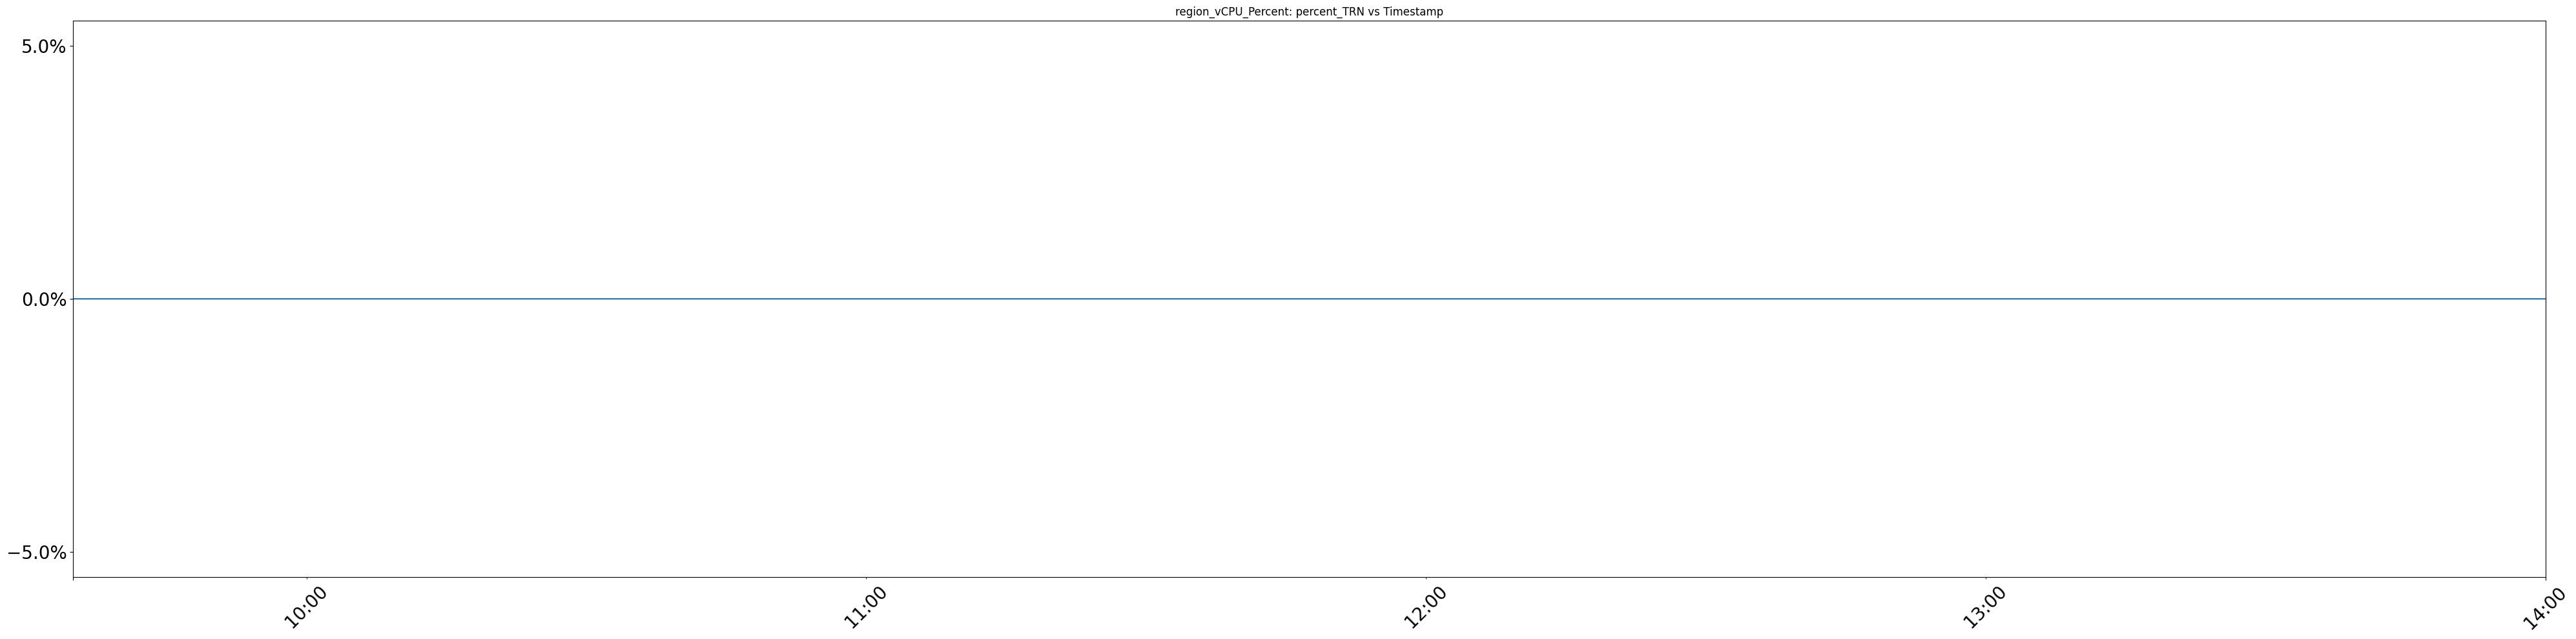

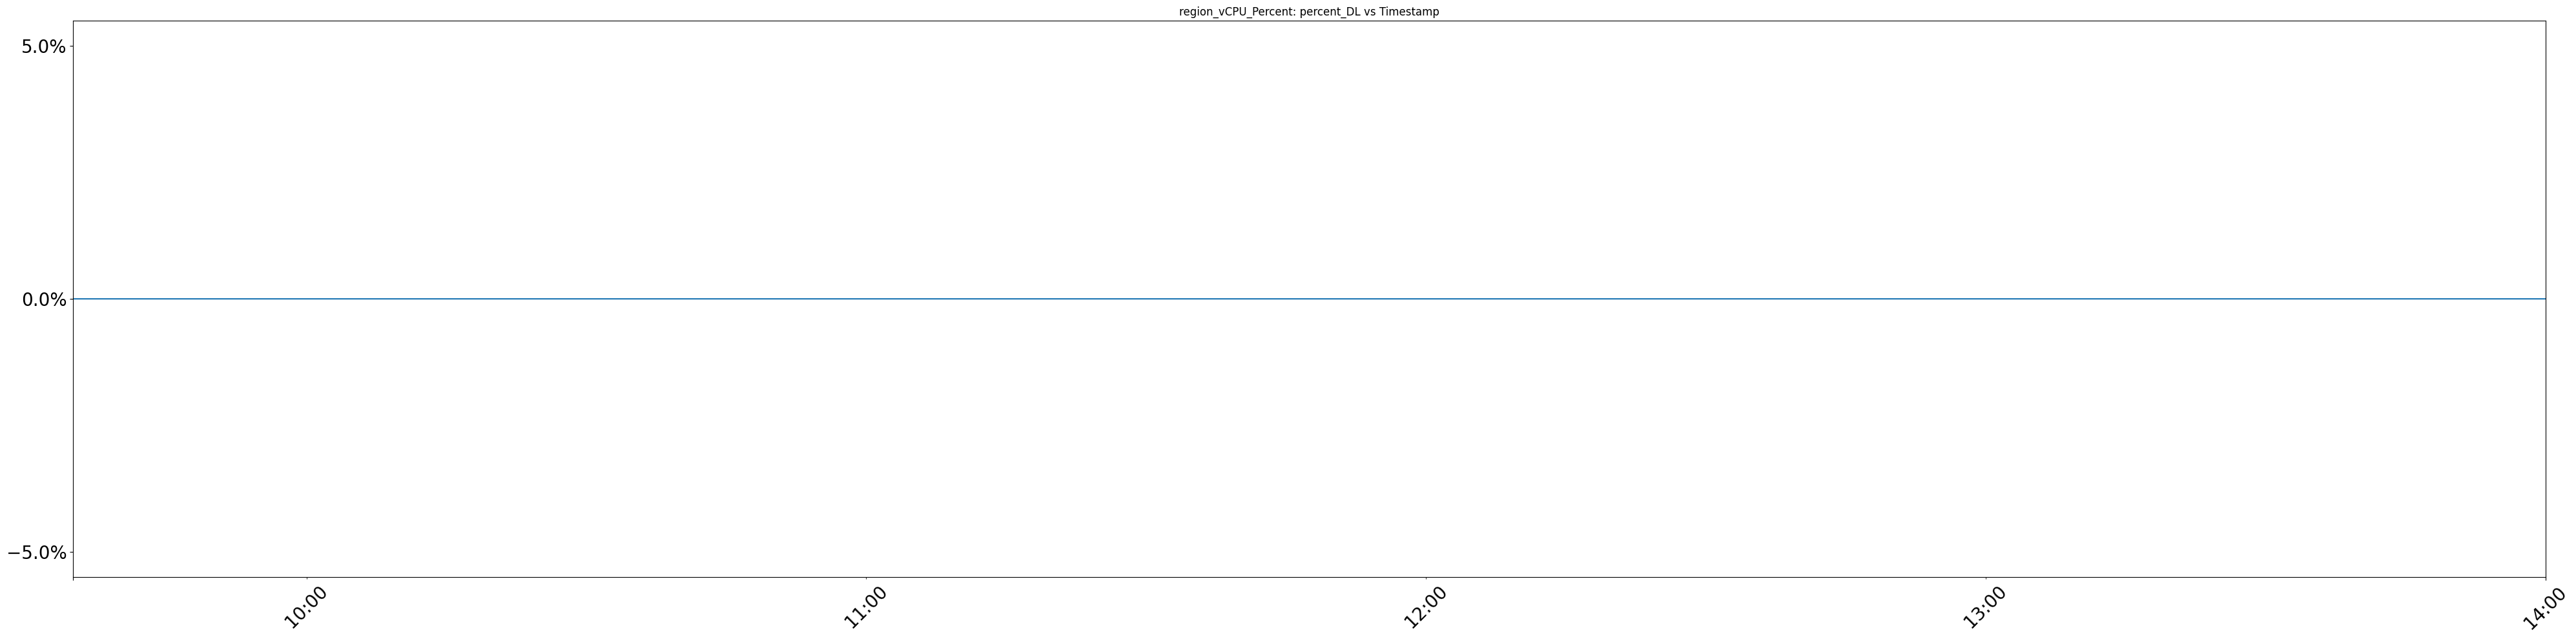

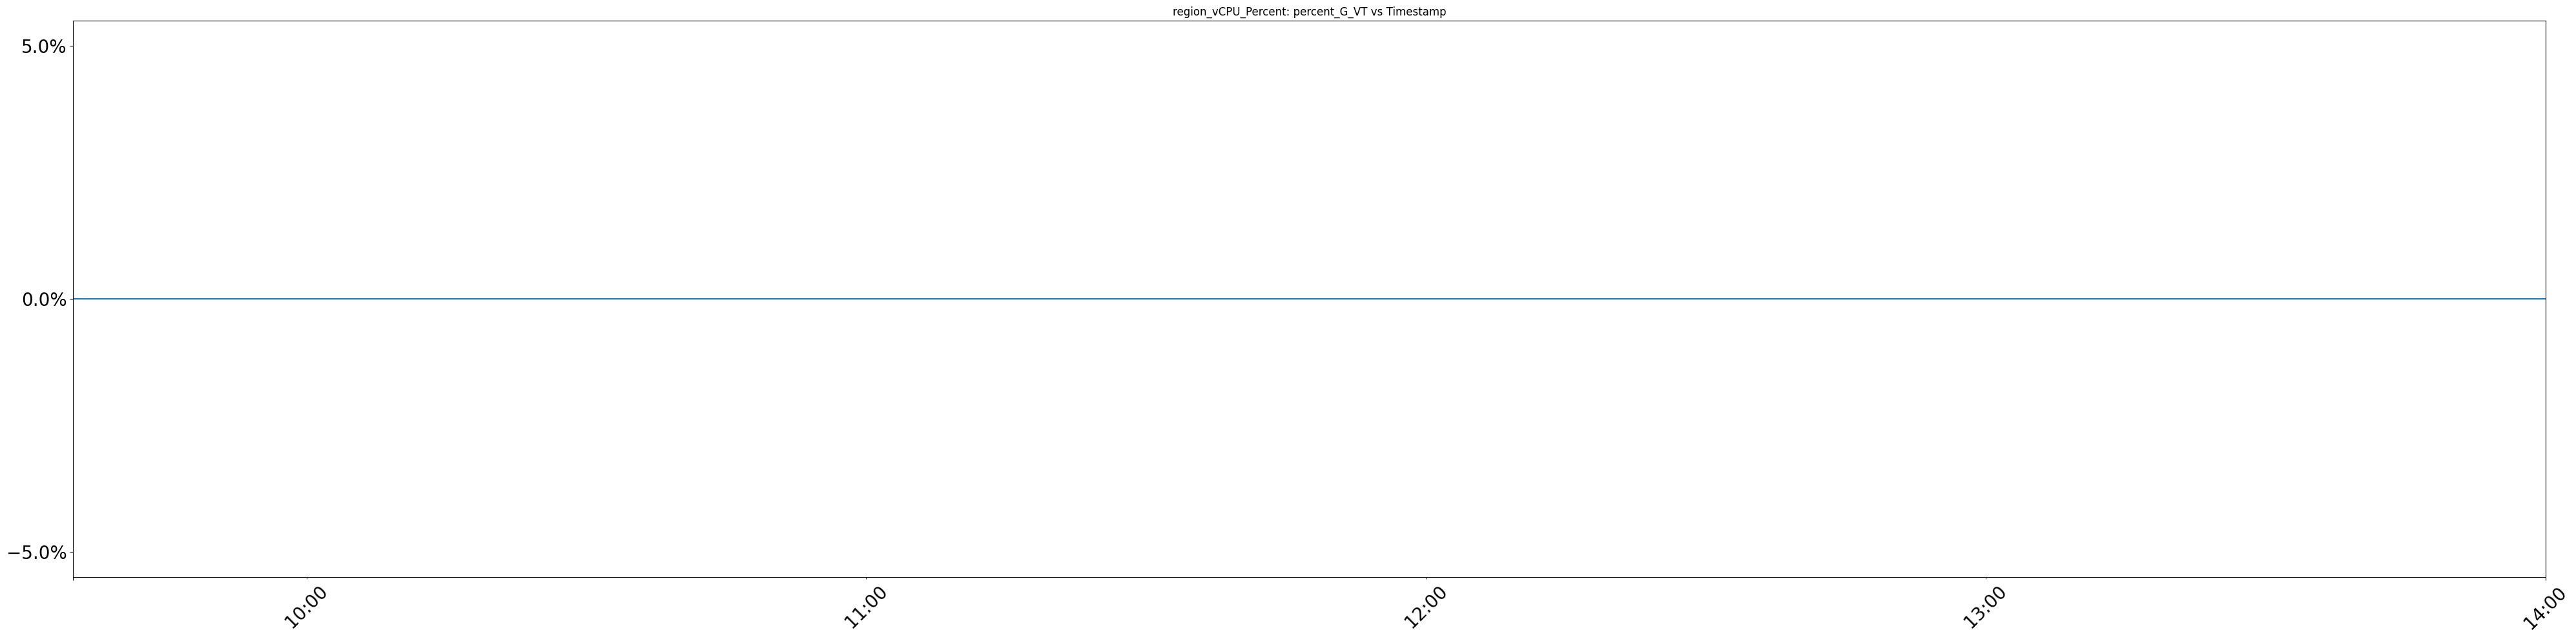

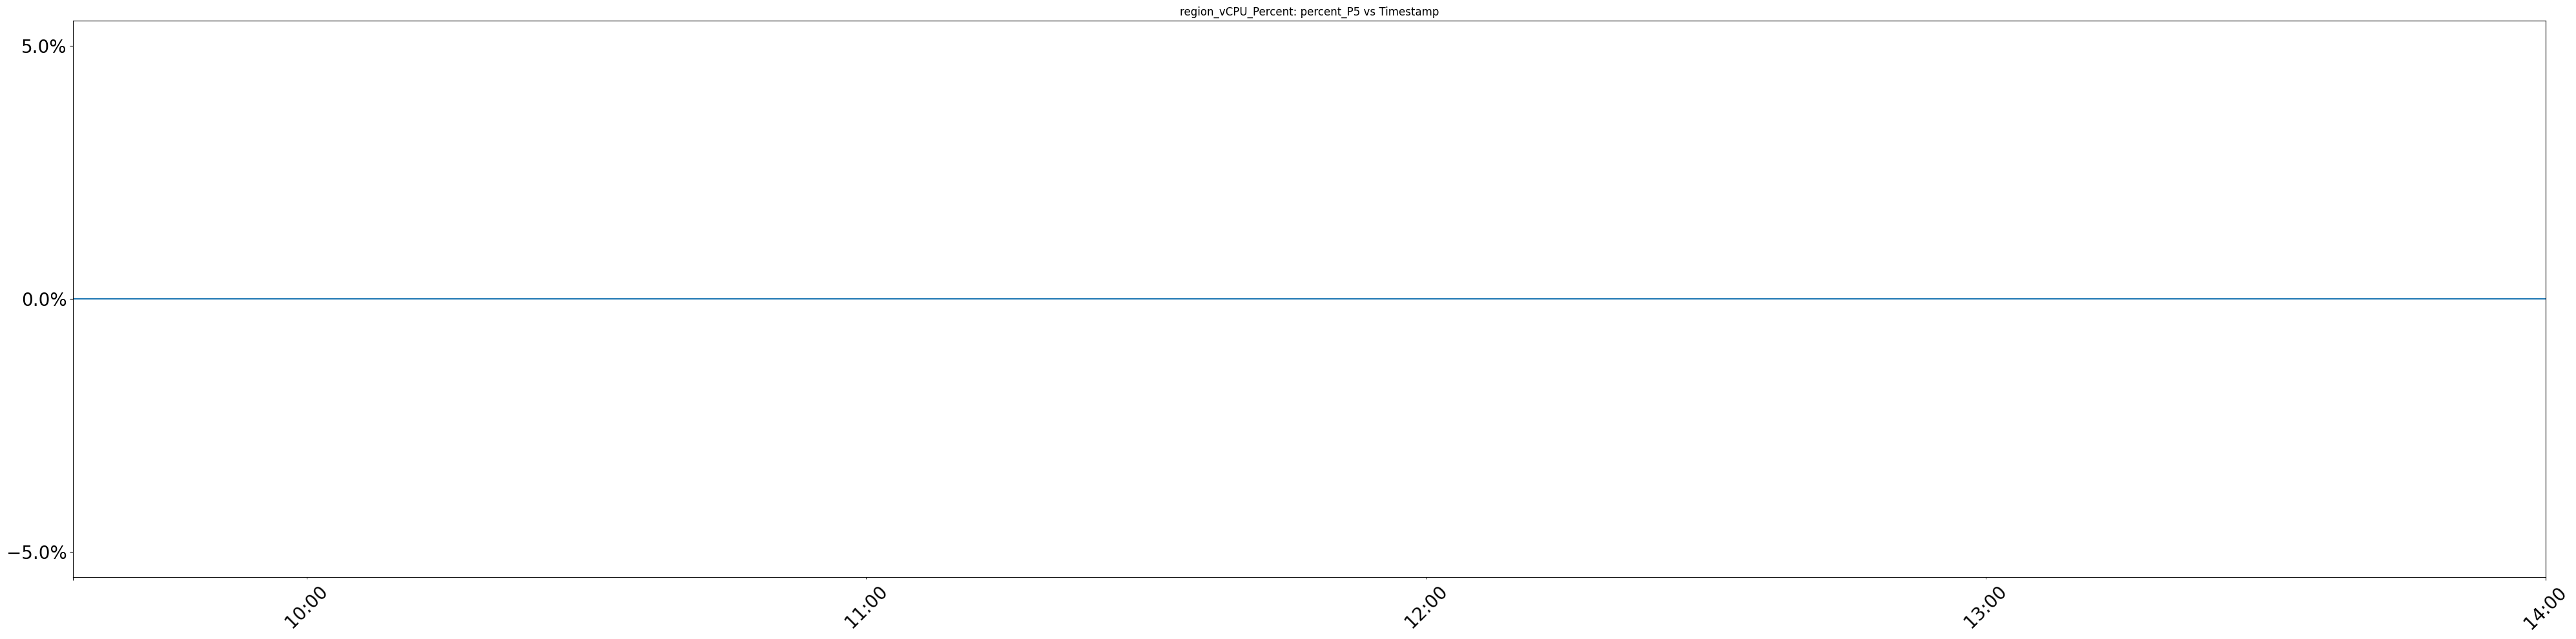

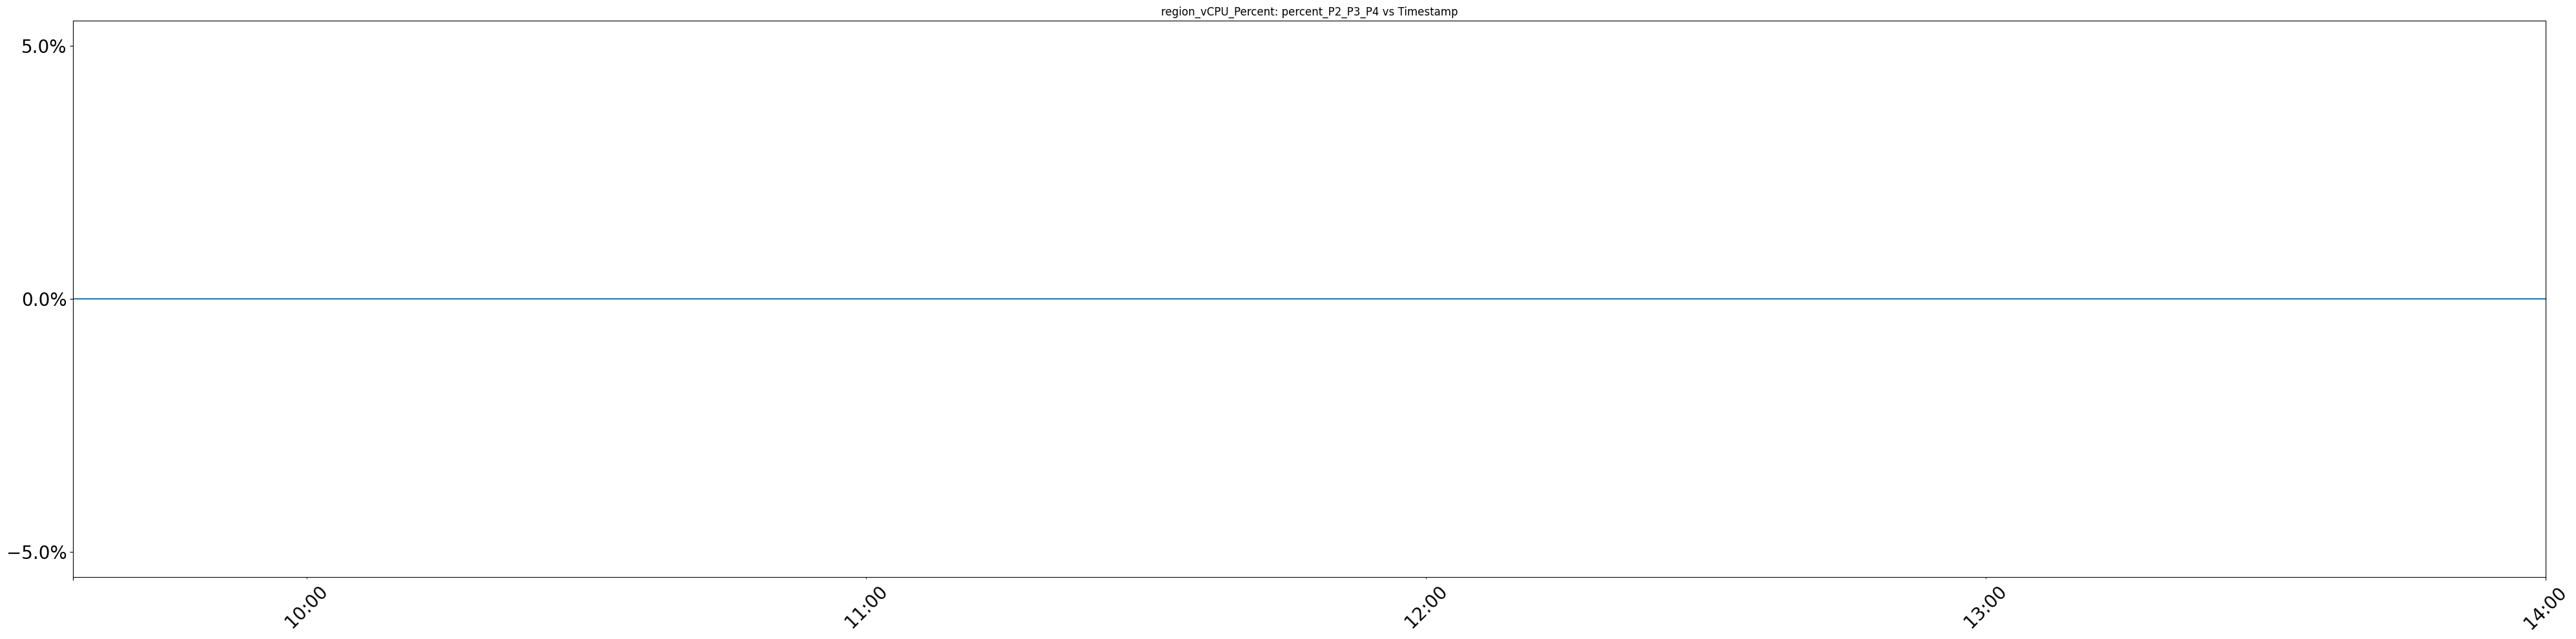

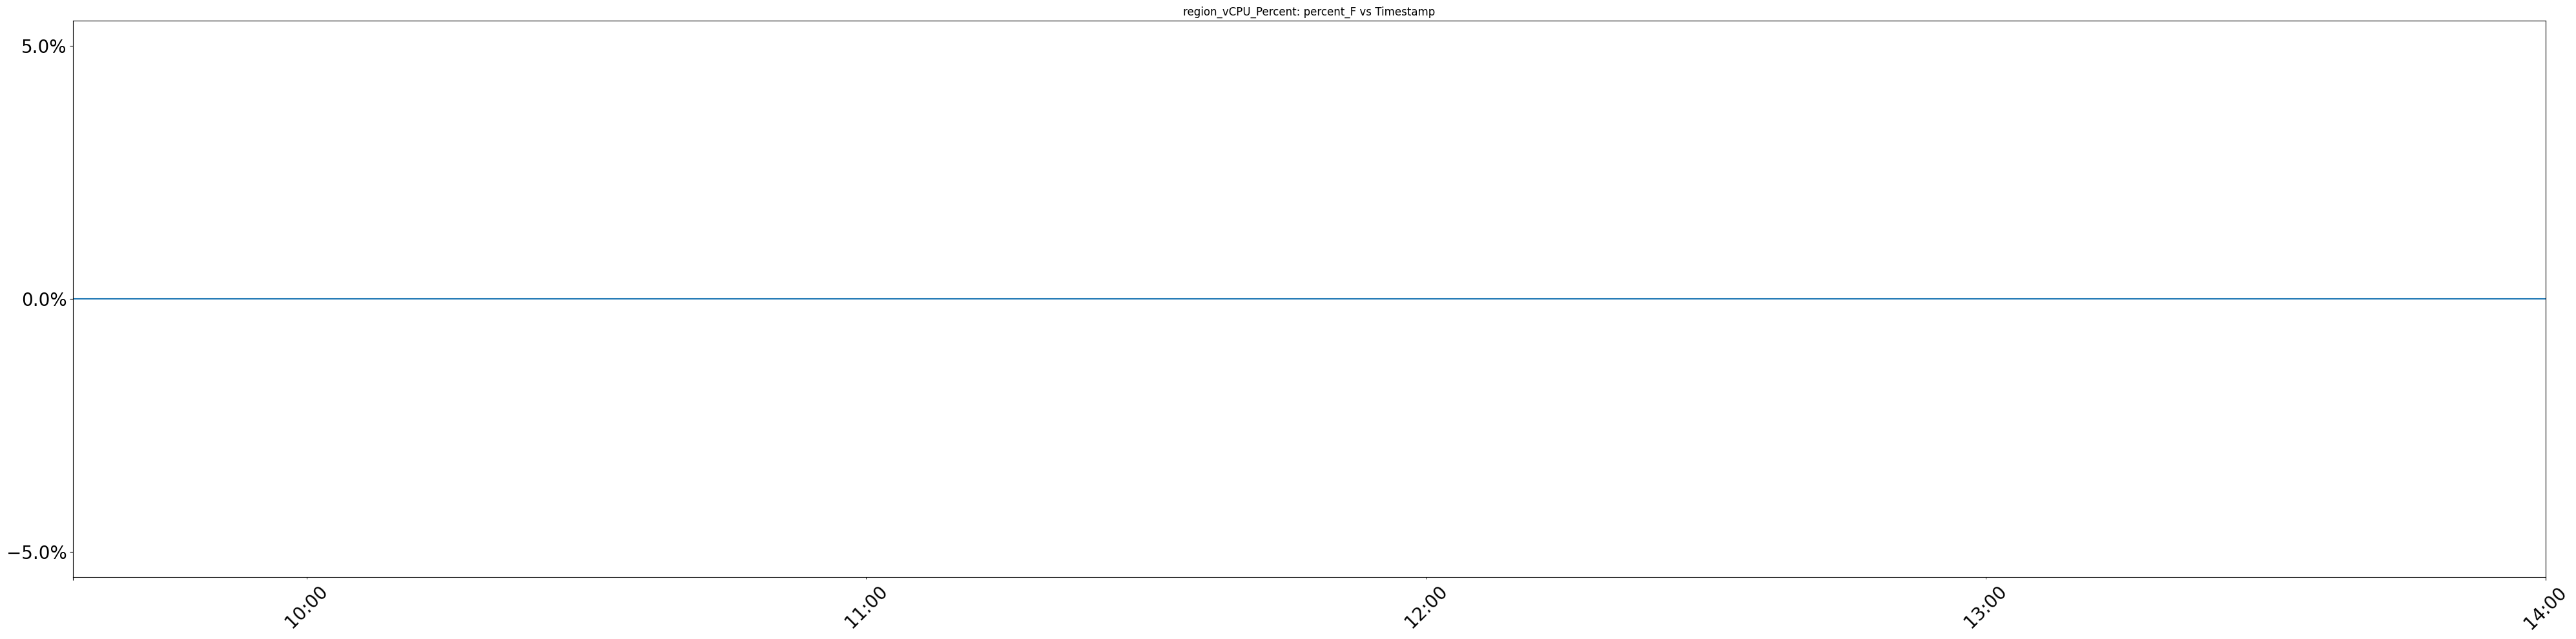

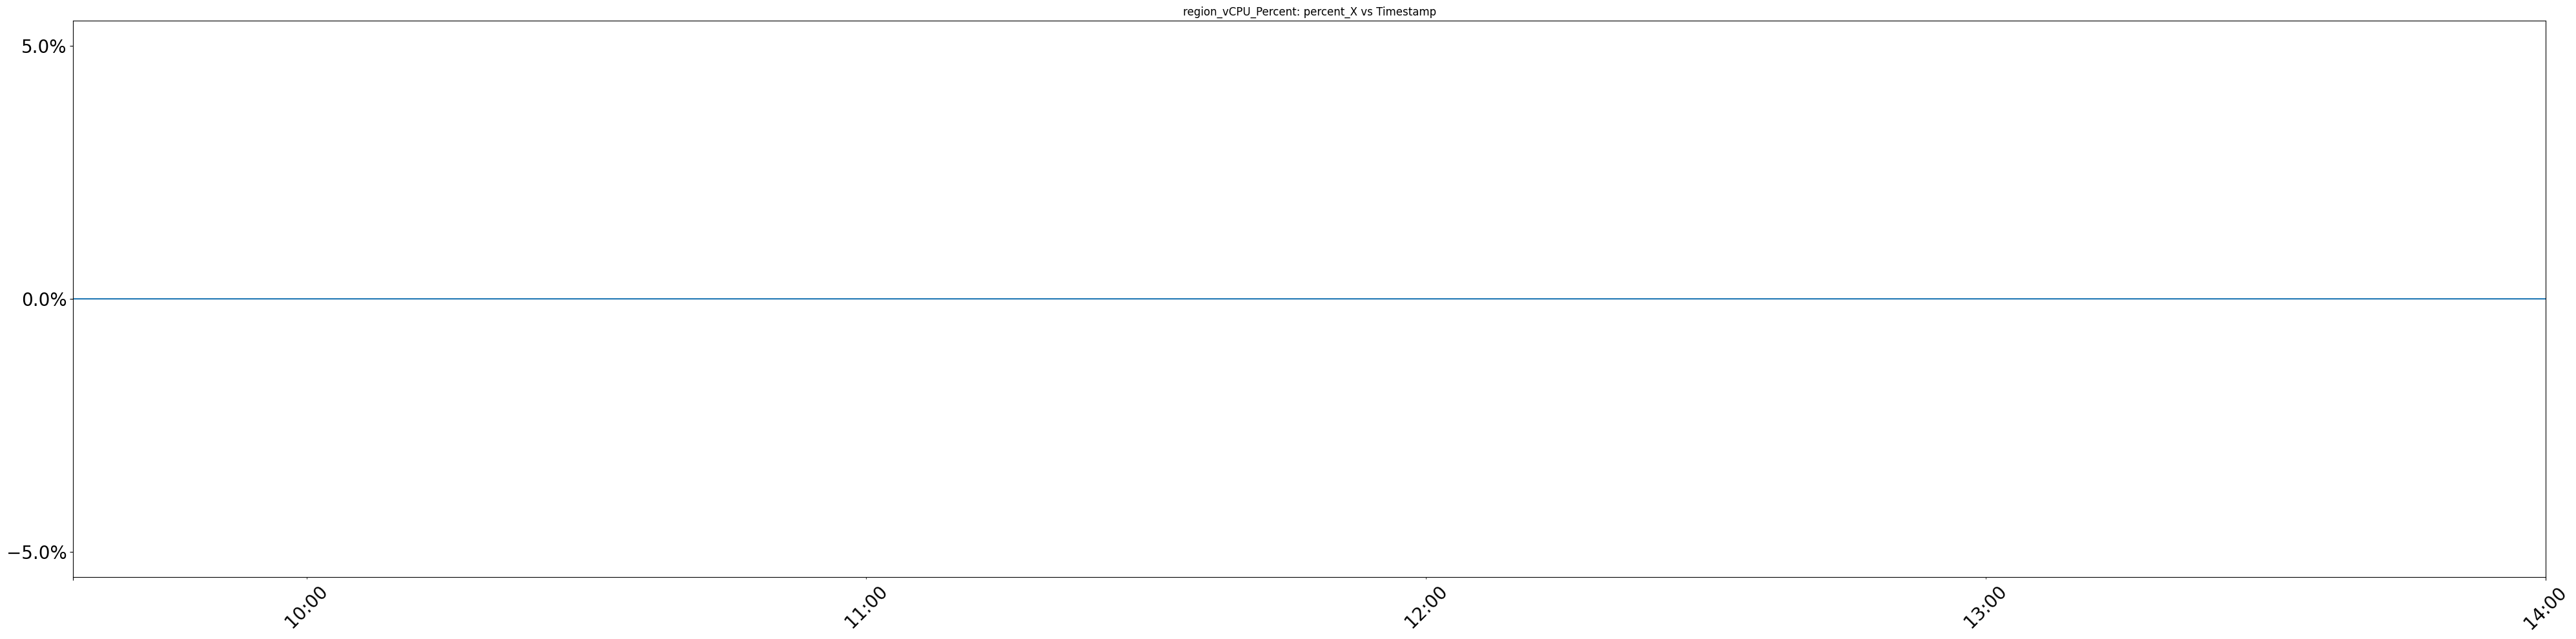

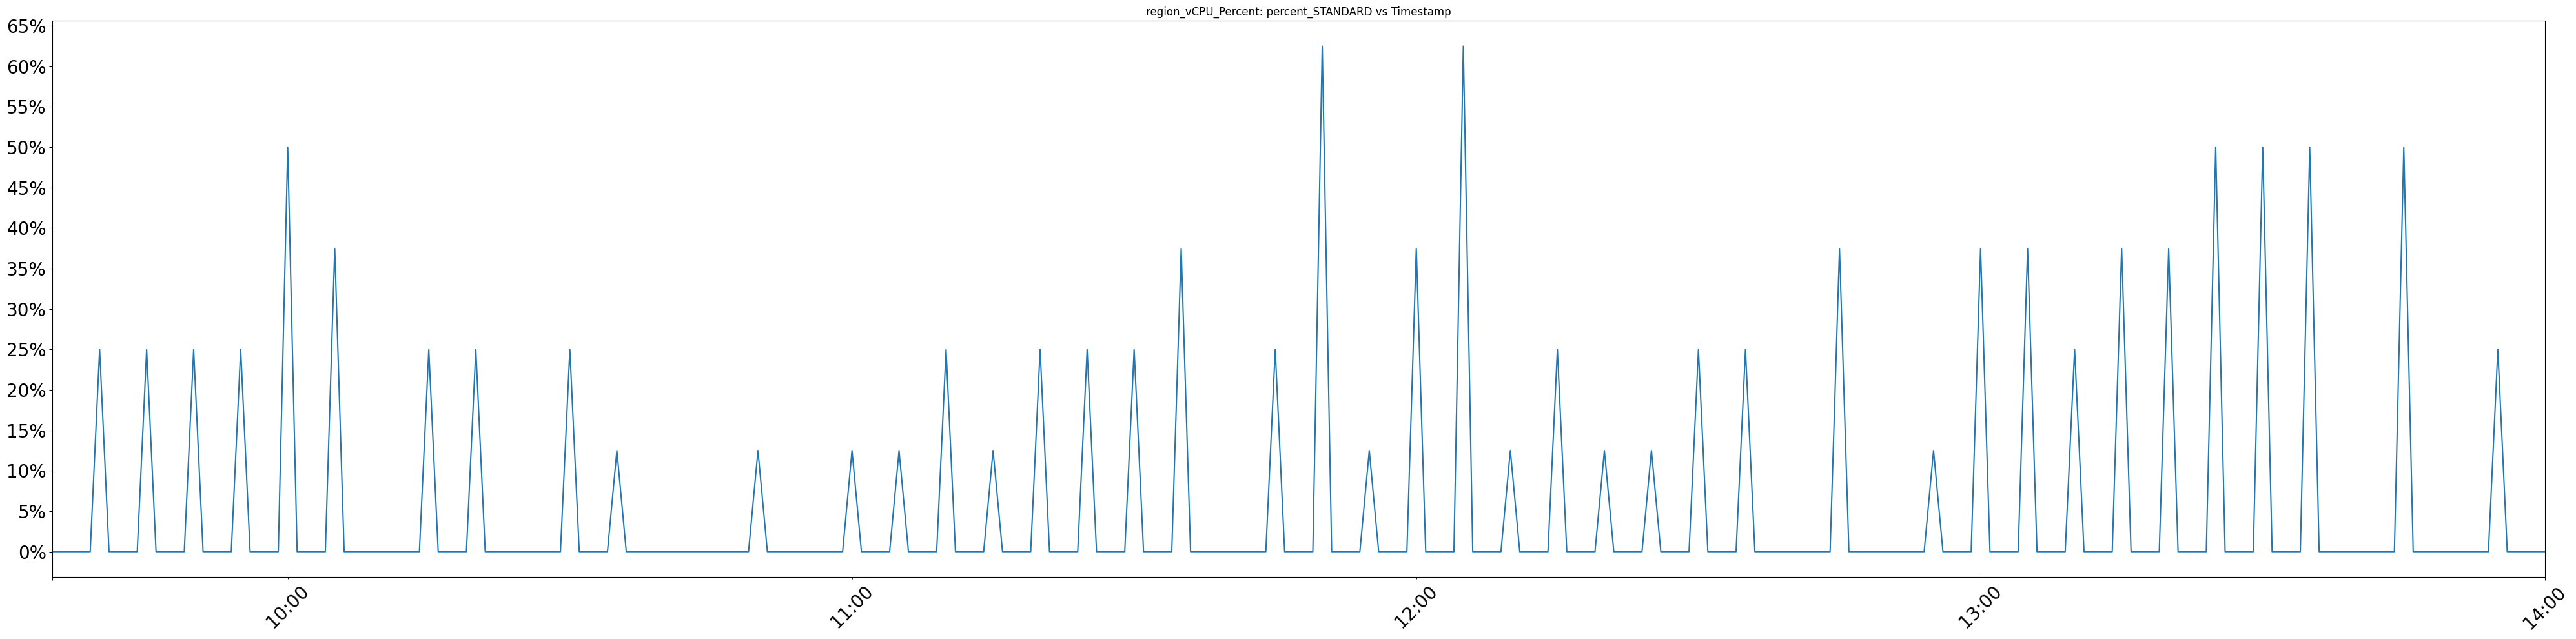

In [222]:
# # region_vCPU_Percent의 각 항목별로 그래프 그리기
for column in percent_cols.columns:
    fig, ax = pyplt.subplots(figsize=(40, 10))
    resampled_df.plot(y=f'{column}', ax=ax, title=f'region_vCPU_Percent: {column} vs Timestamp', rot=45, legend=False)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.05))
    ax.tick_params(axis='both', which='both', labelsize=20)
    pyplt.tight_layout()
    pyplt.show()